In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

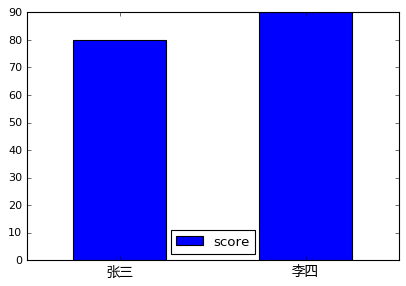

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定
#font = FontProperties(fname="/home/gezi/soft/simsunttc/simsun.ttc", size=12)  #size可不用指定

# linux 的中文字体 /usr/share/fonts/simhei/simhei.ttf

df = DataFrame({"score":[80, 90]}, index=["张三","李四"]) 
ax = df.plot(kind = 'bar', rot = 0) 
labels = [label.decode("utf-8") for label in df.index.values] 
ax.set_xticklabels(labels, fontproperties=font) 
plt.show()

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.fixtext', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.nodropout/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  print('text_ids', text_ids)

  #seq_len = 50	

  #print('words', words)
  argmax_encode = predictor.inference(['text_importance'], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
    
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  y = [100.0*n/np.sum(argmaxs) for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  for word, score in zip(words, y):
    print(word, score)
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.fixtext/model.ckpt-279.2-356000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.fixtext/model.ckpt-279.2-356000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.fixtext/model.ckpt-279.2-356000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.fixtext/model.ckpt-279.2-356000


text_ids [1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1311, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 8 58  3] 69 3
美女
<S> 11.5942028986
美女 84.0579710145
</S> 4.34782608696


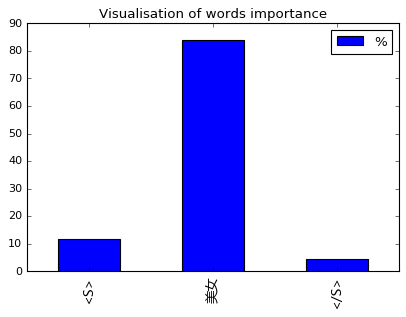

text_ids [6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 6829, 1355, 12429, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [  0  25  27 116   0] 168 5
帅哥戴墨镜
<S> 0.0
帅哥 14.880952381
戴 16.0714285714
墨镜 69.0476190476
</S> 0.0


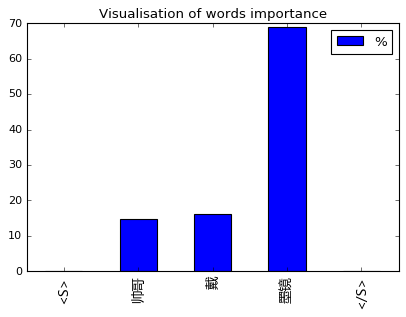

text_ids [3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1 24 25  7  4  7 23  1  6  8  1  8  2  2 26  0] 145 16
初中孩子的免费精品课，用手机，在家上，省心
<S> 0.689655172414
初中 16.5517241379
孩子 17.2413793103
的 4.8275862069
免费 2.75862068966
精品 4.8275862069
课 15.8620689655
， 0.689655172414
用 4.13793103448
手机 5.51724137931
， 0.689655172414
在家 5.51724137931
上 1.37931034483
， 1.37931034483
省心 17.9310344828
</S> 0.0


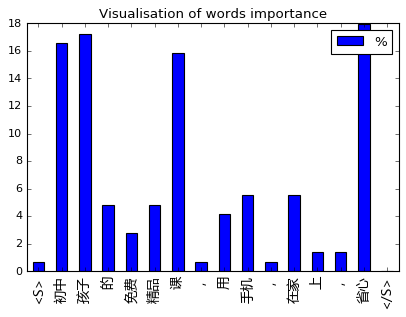

text_ids [17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 4  4  7 22 11  2  7  1 51  1  2 10  8  3  6 15  1] 155 17
好用颜值高才是王道，这些手机现在买才实惠
<S> 2.58064516129
好 2.58064516129
用 4.51612903226
颜 14.1935483871
值 7.09677419355
高 1.29032258065
才 4.51612903226
是 0.645161290323
王道 32.9032258065
， 0.645161290323
这些 1.29032258065
手机 6.45161290323
现在 5.16129032258
买 1.93548387097
才 3.87096774194
实惠 9.67741935484
</S> 0.645161290323


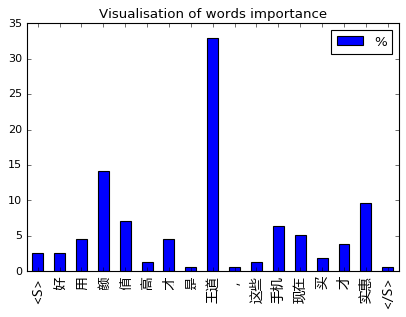

In [7]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

text_ids [243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 6 18 32 15 21  4  9  2  1  6 10  9 18  5  2  0  3 23  1] 185 19
比信用卡分期更划算！有身份证就能申请10-30万贷款
<S> 3.24324324324
比 9.72972972973
信用 17.2972972973
卡 8.10810810811
分期 11.3513513514
更 2.16216216216
划算 4.86486486486
！ 1.08108108108
有 0.540540540541
身份 3.24324324324
证 5.40540540541
就能 4.86486486486
申请 9.72972972973
10 2.7027027027
- 1.08108108108
30 0.0
万 1.62162162162
贷款 12.4324324324
</S> 0.540540540541


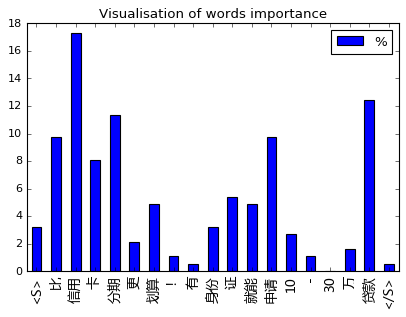

text_ids [4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 4 17  7 75  6 39  3  2  0  1  0  0  0  9  0  0  1  3  0] 167 19
1890元往返飞旧金山?真是赚了,我一直在这里买!
<S> 2.39520958084
<NUM> 10.1796407186
元 4.19161676647
往返 44.9101796407
飞 3.59281437126
旧金山 23.3532934132
? 1.79640718563
真 1.19760479042
是 0.0
赚 0.59880239521
了 0.0
, 0.0
我 0.0
一直 5.38922155689
在 0.0
这里 0.0
买 0.59880239521
! 1.79640718563
</S> 0.0


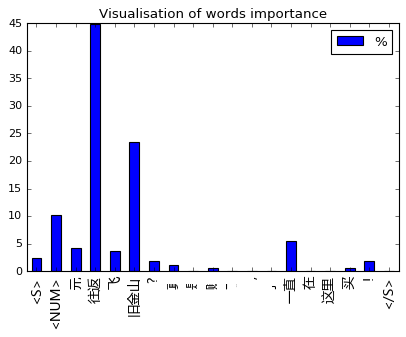

text_ids [14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3  6  5  0 12 11 18 21  5 24 21 32  1  0] 159 14
这才是上班族修本科的正确打开方式！
<S> 1.88679245283
这 3.77358490566
才 3.14465408805
是 0.0
上班 7.54716981132
族 6.91823899371
修 11.320754717
本科 13.2075471698
的 3.14465408805
正确 15.0943396226
打开 13.2075471698
方式 20.1257861635
！ 0.62893081761
</S> 0.0


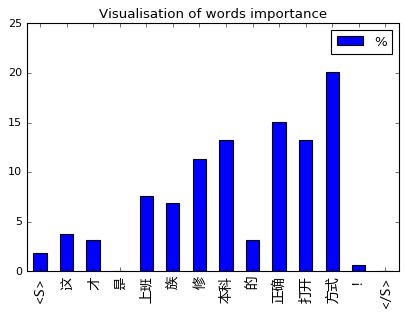

In [8]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

text_ids [19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0 36  1  2  0  2  5 14  2  2  6 17  1  1 42 15 55  0] 201 18
国庆到成都不要住酒店啦,这些民宿带你领略别样风情
<S> 0.0
国庆 17.9104477612
到 0.497512437811
成都 0.995024875622
不 0.0
要 0.995024875622
住 2.48756218905
酒店 6.96517412935
啦 0.995024875622
, 0.995024875622
这些 2.98507462687
民宿 8.45771144279
带 0.497512437811
你 0.497512437811
领略 20.8955223881
别样 7.46268656716
风情 27.3631840796
</S> 0.0


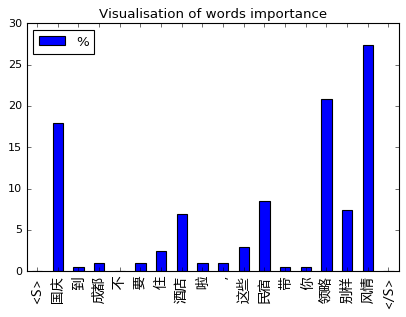

text_ids [8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 8145, 39, 269, 133, 8, 256, 8145, 33, 478, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3 54 14 11  0  0 10 27 12 38  1] 170 11
低头玩手机?不如低头学英语
<S> 1.76470588235
低头 31.7647058824
玩 8.23529411765
手机 6.47058823529
? 0.0
不 0.0
如 5.88235294118
低头 15.8823529412
学 7.05882352941
英语 22.3529411765
</S> 0.588235294118


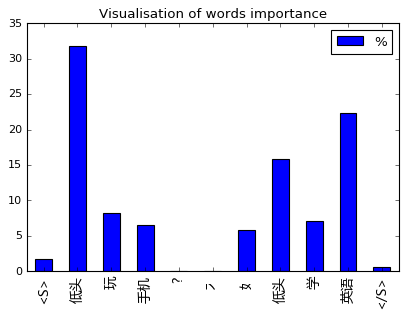

text_ids [6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3 25  0  8 49  0  1  2 11  1  0  0  2  1  3  6  6  1  2  1 26 37  7  1  7
  8  0  0] 208 28
帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你
<S> 1.44230769231
帅哥 12.0192307692
！ 0.0
世界 3.84615384615
名表 23.5576923077
在 0.0
我 0.480769230769
这里 0.961538461538
并 5.28846153846
没 0.480769230769
有 0.0
这么 0.0
贵 0.961538461538
！ 0.480769230769
加 1.44230769231
微 2.88461538462
信 2.88461538462
送 0.480769230769
3 0.961538461538
年 0.480769230769
保修 12.5
里面 17.7884615385
总 3.36538461538
有 0.480769230769
一款 3.36538461538
属于 3.84615384615
你 0.0
</S> 0.0


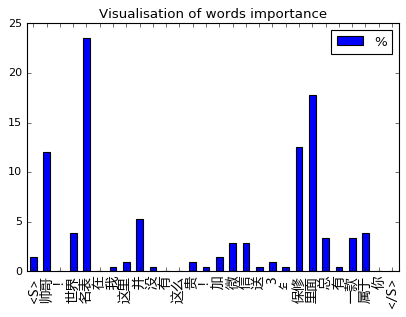

text_ids [2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0 25 46  2  9  1 12  9  2  4  0  1  9 14  0  2  9  1 22  2 11  8  1  6  0] 196 25
精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取
<S> 0.0
精彩 12.7551020408
外教 23.4693877551
一 1.02040816327
对 4.59183673469
一 0.510204081633
英语 6.12244897959
主题 4.59183673469
活动 1.02040816327
课 2.04081632653
, 0.0
让 0.510204081633
孩子 4.59183673469
从此 7.14285714286
爱 0.0
上 1.02040816327
英语 4.59183673469
! 0.510204081633
288 11.2244897959
元 1.02040816327
试听 5.61224489796
课 4.08163265306
免费 0.510204081633
领取 3.0612244898
</S> 0.0


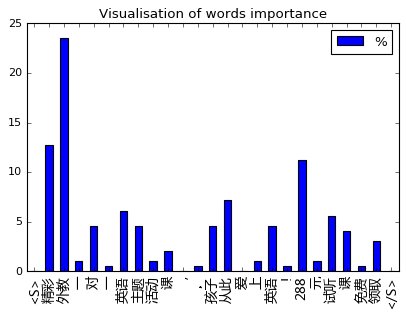

In [9]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

text_ids [2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 5 13 16 12  3 10  3 14 53  9 10  0  5  3  6  0  0  6  2  1] 171 20
打工回来学点啥?学厨师当老板,走到哪都不怕！
<S> 2.92397660819
打工 7.60233918129
回来 9.3567251462
学 7.01754385965
点 1.75438596491
啥 5.84795321637
? 1.75438596491
学 8.18713450292
厨师 30.9941520468
当 5.26315789474
老板 5.84795321637
, 0.0
走 2.92397660819
到 1.75438596491
哪 3.50877192982
都 0.0
不 0.0
怕 3.50877192982
！ 1.16959064327
</S> 0.584795321637


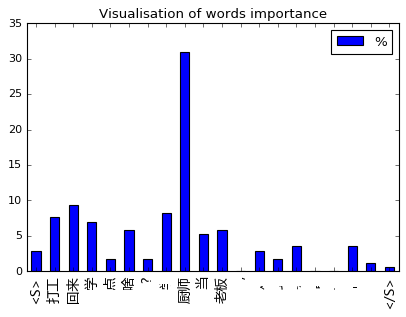

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [  8 115  18   0   2   1  30   0   4   6   0   4   0] 188 13
水饺加盟,无需厨师,总部扶持创业!
<S> 4.25531914894
水饺 61.170212766
加盟 9.57446808511
, 0.0
无 1.06382978723
需 0.531914893617
厨师 15.9574468085
, 0.0
总部 2.12765957447
扶持 3.1914893617
创业 0.0
! 2.12765957447
</S> 0.0


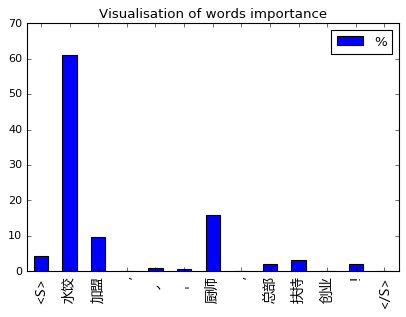

text_ids [4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [  6 112  18   0   2   1  34   0   4   9   3   1] 190 12
水饺加盟,无需厨师,总部扶持创业
<S> 3.15789473684
水饺 58.9473684211
加盟 9.47368421053
, 0.0
无 1.05263157895
需 0.526315789474
厨师 17.8947368421
, 0.0
总部 2.10526315789
扶持 4.73684210526
创业 1.57894736842
</S> 0.526315789474


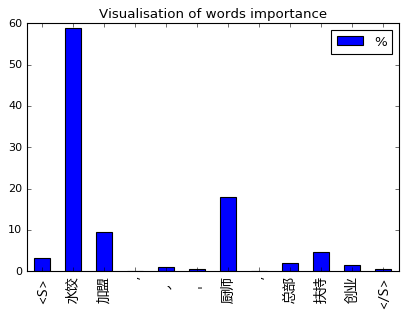

In [10]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

text_ids [1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3 58 43 23  0  2 21  0  5  8  2 13  2  1  0] 181 15
iPhone隐藏功能：高铁也能在线选座了！
<S> 1.65745856354
iphone 32.044198895
隐藏 23.7569060773
功能 12.7071823204
： 0.0
高 1.10497237569
铁 11.6022099448
也 0.0
能 2.76243093923
在线 4.41988950276
选 1.10497237569
座 7.18232044199
了 1.10497237569
！ 0.552486187845
</S> 0.0


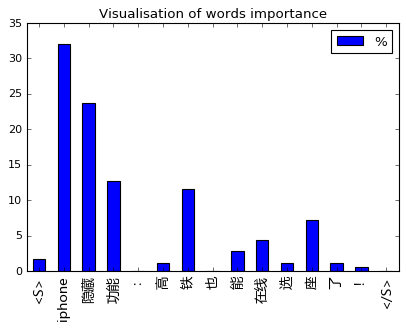

In [11]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

text_ids [4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0 17 17 29 11 63  1  7 10  0  1  0  2 12  6  0 12 24  0] 212 19
携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀
<S> 0.0
携手 8.01886792453
欧歌 8.01886792453
步入 13.679245283
音乐 5.18867924528
殿堂 29.7169811321
, 0.471698113208
领略 3.30188679245
ta 4.71698113208
的 0.0
神奇 0.471698113208
, 0.0
让 0.943396226415
心灵 5.66037735849
插 2.83018867925
上 0.0
音乐 5.66037735849
翅膀 11.320754717
</S> 0.0


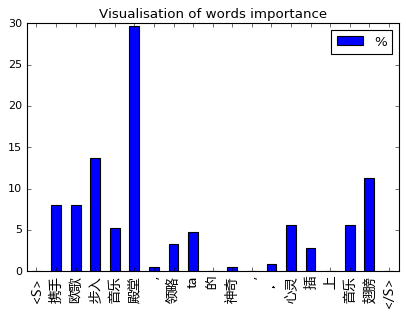

In [12]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

text_ids [949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 949, 1009, 852, 253, 7, 1761, 3744, 131, 7, 763, 728, 30, 10, 1397, 94, 5, 407, 1646, 68, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3 25 26 25  4  0 14 22 24  0  8 12  2  1  2  1  0  6 17  3  0] 195 21
底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.
<S> 1.53846153846
底价 12.8205128205
预订 13.3333333333
酒店 12.8205128205
服务 2.05128205128
, 0.0
交通 7.17948717949
便利 11.2820512821
设 12.3076923077
, 0.0
施 4.10256410256
齐 6.15384615385
全 1.02564102564
  0.512820512821
欢迎 1.02564102564
您 0.512820512821
的 0.0
光 3.07692307692
临 8.71794871795
. 1.53846153846
</S> 0.0


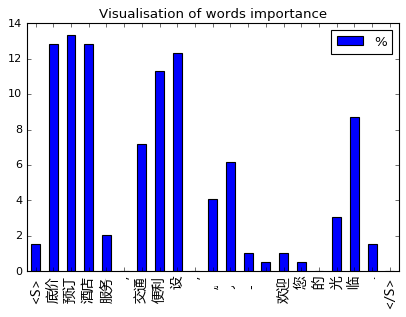

In [13]:
predict('底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.')

text_ids [8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0 77 57  7 21 15  5  0  0  1  1 16  7  0] 207 14
巨人游泳五星级酒店培训,一对一游泳培训
<S> 0.0
巨人 37.1980676329
游泳 27.5362318841
五 3.38164251208
星级 10.1449275362
酒店 7.24637681159
培训 2.4154589372
, 0.0
一 0.0
对 0.48309178744
一 0.48309178744
游泳 7.72946859903
培训 3.38164251208
</S> 0.0


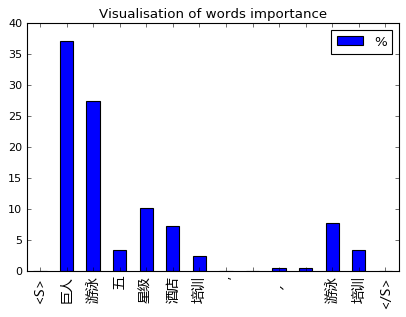

In [14]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

text_ids [1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1216, 2016, 27, 136, 640, 32, 881, 7345, 33, 478, 44, 640, 3811, 3065, 2812, 252, 478, 3, 912, 579, 57, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 4 10 13  3  5  9  2 25 29  8 14  1  6 27 11 26  1  7  1  3  0  0  0  0] 205 24
为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！
<S> 1.9512195122
为什么 4.87804878049
妈妈 6.34146341463
都 1.46341463415
让 2.43902439024
孩子 4.39024390244
来 0.975609756098
vip 12.1951219512
jr 14.1463414634
学 3.90243902439
英语 6.82926829268
？ 0.487804878049
孩子 2.92682926829
大胆 13.1707317073
开口 5.36585365854
流利 12.6829268293
说 0.487804878049
英语 3.41463414634
， 0.487804878049
只要 1.46341463415
30 0.0
天 0.0
！ 0.0
</S> 0.0


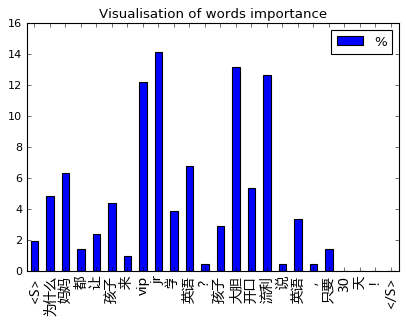

In [15]:
predict('为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！')

text_ids [4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1 94 10 46  3  2  0  1  0  0  0 10  0  0  0  3  0] 170 17
往返飞旧金山?真是赚了,我一直在这里买!
<S> 0.588235294118
往返 55.2941176471
飞 5.88235294118
旧金山 27.0588235294
? 1.76470588235
真 1.17647058824
是 0.0
赚 0.588235294118
了 0.0
, 0.0
我 0.0
一直 5.88235294118
在 0.0
这里 0.0
买 0.0
! 1.76470588235
</S> 0.0


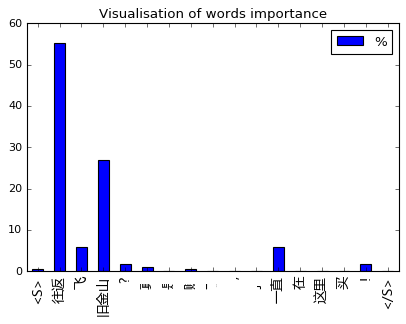

In [16]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

text_ids [8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 8, 74, 626, 852, 3, 341, 5, 5404, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 2  1  2 20 23  0  1  2 81  4  0] 136 11
不要住酒店，这里的民宿好
<S> 1.47058823529
不 0.735294117647
要 1.47058823529
住 14.7058823529
酒店 16.9117647059
， 0.0
这里 0.735294117647
的 1.47058823529
民宿 59.5588235294
好 2.94117647059
</S> 0.0


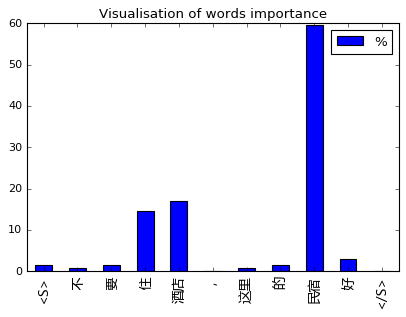

In [17]:
predict('不要住酒店，这里的民宿好')

text_ids [8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 8, 74, 626, 5404, 3, 341, 5, 852, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3  1  4 26 64  1  2  2 28  2  2] 135 11
不要住民宿，这里的酒店好
<S> 2.22222222222
不 0.740740740741
要 2.96296296296
住 19.2592592593
民宿 47.4074074074
， 0.740740740741
这里 1.48148148148
的 1.48148148148
酒店 20.7407407407
好 1.48148148148
</S> 1.48148148148


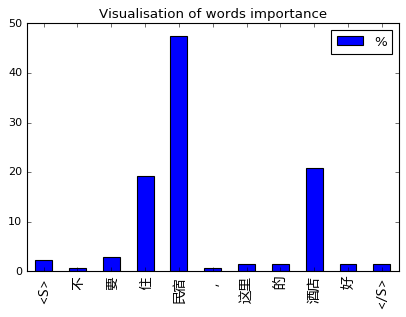

In [18]:
predict('不要住民宿，这里的酒店好')

text_ids [247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 2 17  8 44 11 79  0  0  1  0  0  1  0 12  1  3 11  6  1  0] 197 20
男神开车专用墨镜，怎么能少了它，降价后就快抢完了
<S> 1.0152284264
男 8.62944162437
神 4.06091370558
开车 22.3350253807
专用 5.58375634518
墨镜 40.1015228426
， 0.0
怎么 0.0
能 0.507614213198
少 0.0
了 0.0
它 0.507614213198
， 0.0
降价 6.09137055838
后 0.507614213198
就 1.52284263959
快抢 5.58375634518
完 3.04568527919
了 0.507614213198
</S> 0.0


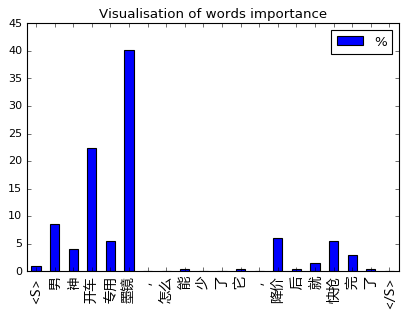

In [19]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

text_ids [59, 5, 22092, 5705, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 59, 5, 22092, 5705, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1  7  2 33 31 17  3  7  0  2  5  5  0 53  7 10  0] 183 17
我的家乡惠州越来越热，选一款喜欢的墨镜很重要
<S> 0.546448087432
我 3.82513661202
的 1.09289617486
家乡 18.0327868852
惠州 16.9398907104
越来 9.28961748634
越 1.6393442623
热 3.82513661202
， 0.0
选 1.09289617486
一款 2.73224043716
喜欢 2.73224043716
的 0.0
墨镜 28.9617486339
很 3.82513661202
重要 5.46448087432
</S> 0.0


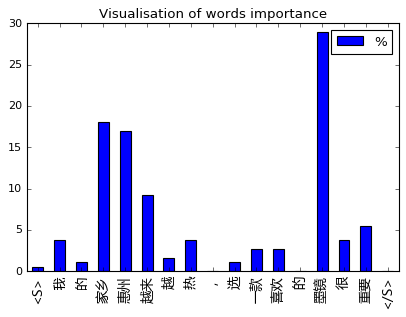

In [20]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要')

text_ids [59, 5, 22092, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 59, 5, 22092, 3781, 914, 326, 3, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1  6  1 29 14  5 11  0  2  5  6  0 74 10 13  0] 177 16
我的家乡越来越热，选一款喜欢的墨镜很重要
<S> 0.564971751412
我 3.38983050847
的 0.564971751412
家乡 16.384180791
越来 7.90960451977
越 2.82485875706
热 6.21468926554
， 0.0
选 1.12994350282
一款 2.82485875706
喜欢 3.38983050847
的 0.0
墨镜 41.8079096045
很 5.64971751412
重要 7.34463276836
</S> 0.0


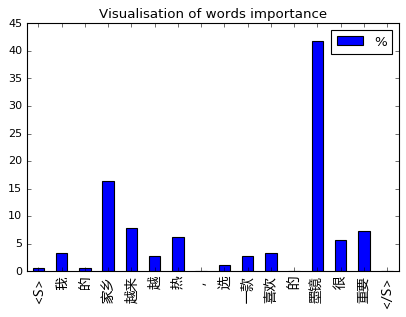

In [34]:
predict('我的家乡越来越热，选一款喜欢的墨镜很重要')

text_ids [38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 38, 1262, 1553, 5, 12429, 343, 1826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [  2   7  11   9   0 111   8  13   0] 161 9
选一款喜欢的墨镜很重要
<S> 1.24223602484
选 4.34782608696
一款 6.83229813665
喜欢 5.5900621118
的 0.0
墨镜 68.9440993789
很 4.96894409938
重要 8.07453416149
</S> 0.0


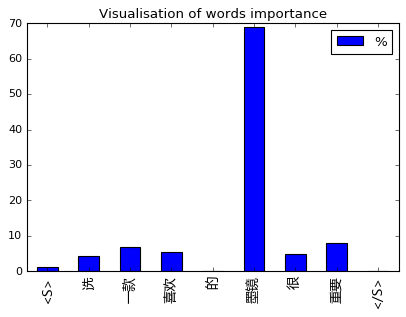

In [22]:
predict('选一款喜欢的墨镜很重要')

text_ids [10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 10182, 3404, 3199, 1798, 12022, 1744, 1456, 4075, 605, 554, 10, 645, 1246, 370, 5063, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 0 11 19  6 13 51  5 18 22  4  2  2  7  4  8 39  1] 212 17
asics助力#{地域}鸟巢半马 推限量版跑鞋
<S> 0.0
asics 5.18867924528
助力 8.96226415094
# 2.83018867925
{ 6.1320754717
地域 24.0566037736
} 2.35849056604
鸟 8.49056603774
巢 10.3773584906
半 1.88679245283
马 0.943396226415
  0.943396226415
推 3.30188679245
限量 1.88679245283
版 3.77358490566
跑鞋 18.3962264151
</S> 0.471698113208


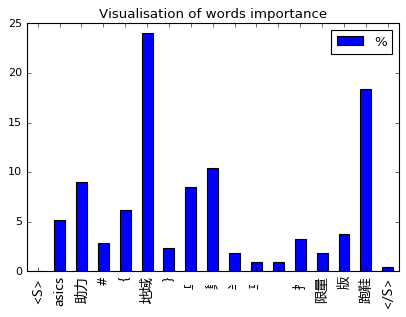

In [23]:
predict('asics助力#{地域}鸟巢半马 推限量版跑鞋')

text_ids [365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 365, 196, 7327, 7, 609, 57, 7231, 7, 18, 2039, 1153, 7, 1352, 4393, 7, 566, 5411, 7, 1397, 2289, 561, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1  8  9 50  2  3  1 23  0  2  7  1  1 12 15  0  8 15  1  6  7 10  0] 182 23
10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询
<S> 0.549450549451
10 4.3956043956
套 4.94505494505
起订 27.4725274725
, 1.0989010989
7 1.64835164835
天 0.549450549451
到货 12.6373626374
, 0.0
有 1.0989010989
现货 3.84615384615
供应 0.549450549451
, 0.549450549451
精选 6.59340659341
面料 8.24175824176
, 0.0
质量 4.3956043956
上乘 8.24175824176
, 0.549450549451
欢迎 3.2967032967
电话 3.84615384615
咨询 5.49450549451
</S> 0.0


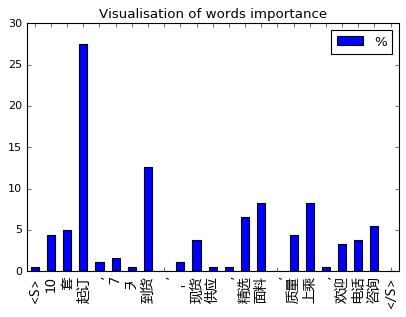

In [24]:
predict('10套起订,7天到货,有现货供应,精选面料,质量上乘,欢迎电话咨询')

text_ids [482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 482, 6, 836, 2225, 16242, 4155, 850, 34, 628, 142, 6753, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1 13  4 21 32 18 75  7  5  4  1 14  1  1] 197 14
牛！亲闺密语内衣竟然用她做模特！
<S> 0.507614213198
牛 6.59898477157
！ 2.03045685279
亲 10.6598984772
闺 16.2436548223
密语 9.13705583756
内衣 38.0710659898
竟然 3.55329949239
用 2.53807106599
她 2.03045685279
做 0.507614213198
模特 7.10659898477
！ 0.507614213198
</S> 0.507614213198


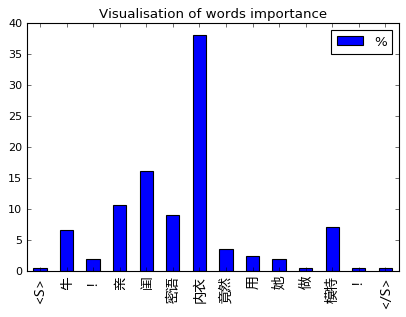

In [25]:
predict('牛！亲闺密语内衣竟然用她做模特！')

text_ids [1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1469, 1610, 832, 666, 3, 691, 1630, 72, 3, 136, 12, 272, 3047, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 4 54 33 22  4  0  7 20  8  2  0  0  7 15  4  0] 180 16
室内净化生意火爆，除甲醛加盟，让你赚大钱！
<S> 2.22222222222
室内 30.0
净化 18.3333333333
生意 12.2222222222
火爆 2.22222222222
， 0.0
除 3.88888888889
甲醛 11.1111111111
加盟 4.44444444444
， 1.11111111111
让 0.0
你 0.0
赚 3.88888888889
大钱 8.33333333333
！ 2.22222222222
</S> 0.0


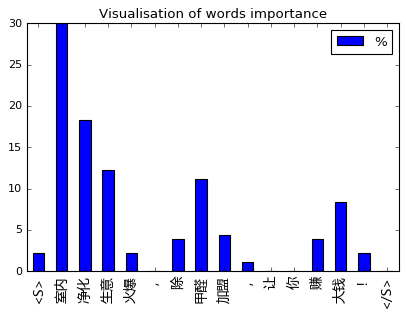

In [26]:
predict('室内净化生意火爆，除甲醛加盟，让你赚大钱！')

text_ids [1349, 21, 2941, 470, 525, 3, 11, 196, 7327, 3, 80, 623, 167, 310, 3, 1202, 57, 5754, 80, 1911, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1349, 21, 2941, 470, 525, 3, 11, 196, 7327, 3, 80, 623, 167, 310, 3, 1202, 57, 5754, 80, 1911, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 2 42  4 52  9  1  0  0  9 30  0  1  3  2  3  0  7  3  7  1 11  0  0] 187 23
25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！
<S> 1.06951871658
25 22.4598930481
年 2.13903743316
西服 27.807486631
定制 4.8128342246
经验 0.534759358289
， 0.0
一 0.0
套 4.8128342246
起订 16.0427807487
， 0.0
免费 0.534759358289
上门 1.60427807487
量 1.06951871658
身 1.60427807487
， 0.0
15 3.74331550802
天 1.60427807487
交货 3.74331550802
免费 0.534759358289
送货 5.88235294118
！ 0.0
</S> 0.0


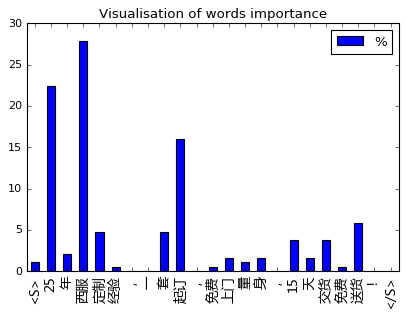

In [27]:
predict('25年西服定制经验，一套起订，免费上门量身，15天交货免费送货！')

text_ids [1115, 14384, 43, 43, 59, 5, 2856, 3870, 56, 19135, 96, 7, 7988, 66, 212, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1115, 14384, 43, 43, 59, 5, 2856, 3870, 56, 19135, 96, 7, 7988, 66, 212, 2728, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 2  7 26  2  1  0  4 29 63  2  7  3  0  8  5  8 19  0] 186 18
时尚日记--我的欧美女装买手电商,七天包邮退换
<S> 1.0752688172
时尚 3.76344086022
日记 13.9784946237
- 1.0752688172
- 0.537634408602
我 0.0
的 2.15053763441
欧美 15.5913978495
女装 33.8709677419
买 1.0752688172
手电 3.76344086022
商 1.61290322581
, 0.0
七天 4.30107526882
包 2.68817204301
邮 4.30107526882
退换 10.2150537634
</S> 0.0


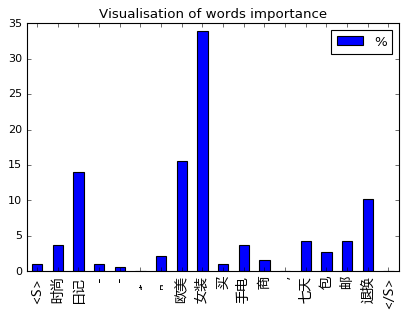

In [28]:
predict('时尚日记--我的欧美女装买手电商,七天包邮退换')

text_ids [1892, 1393, 1509, 340, 726, 7, 3380, 163, 13, 489, 133, 699, 94, 5, 229, 700, 1373, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1892, 1393, 1509, 340, 726, 7, 3380, 163, 13, 489, 133, 699, 94, 5, 229, 700, 1373, 2304, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 2 44 20 22  7 24  0 21  2  2  2  0  1  1  1  0  2 23 12  0] 186 20
素颜胜带妆,护肤哪家强?[您的品牌]正品特卖
<S> 1.0752688172
素 23.6559139785
颜 10.752688172
胜 11.8279569892
带 3.76344086022
妆 12.9032258065
, 0.0
护肤 11.2903225806
哪 1.0752688172
家 1.0752688172
强 1.0752688172
? 0.0
[ 0.537634408602
您 0.537634408602
的 0.537634408602
品牌 0.0
] 1.0752688172
正品 12.3655913978
特卖 6.45161290323
</S> 0.0


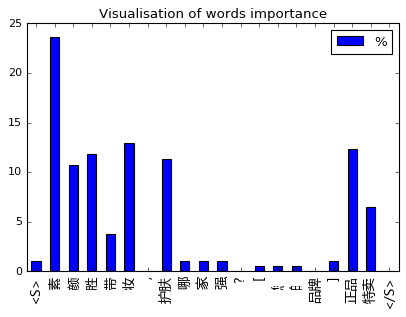

In [29]:
predict('素颜胜带妆,护肤哪家强?[您的品牌]正品特卖')

text_ids [1935, 73, 726, 10396, 4004, 136, 12, 7228, 158, 18953, 7, 4385, 5149, 2304, 82, 271, 154, 1653, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1935, 73, 726, 10396, 4004, 136, 12, 7228, 158, 18953, 7, 4385, 5149, 2304, 82, 271, 154, 1653, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1  6  6 20 34 41  2  2 14  5  5  1 18 24  9  0  3  3 12  2  0] 208 21
口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!
<S> 0.480769230769
口碑 2.88461538462
美 2.88461538462
妆 9.61538461538
国货 16.3461538462
照样 19.7115384615
让 0.961538461538
你 0.961538461538
肌肤 6.73076923077
水 2.40384615385
当当 2.40384615385
, 0.480769230769
圣诞 8.65384615385
礼盒 11.5384615385
特卖 4.32692307692
低 0.0
至 1.44230769231
1 1.44230769231
折起 5.76923076923
! 0.961538461538
</S> 0.0


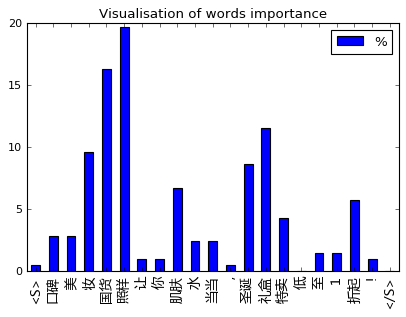

In [30]:
predict('口碑美妆国货照样让你肌肤水当当,圣诞礼盒特卖低至1折起!')

text_ids [79, 81, 51, 139, 11852, 44, 32, 7871, 92, 3, 2545, 595, 81, 283, 2816, 1578, 803, 3, 2085, 4927, 29, 416, 5, 94, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 79, 81, 51, 139, 11852, 44, 32, 7871, 92, 3, 2545, 595, 81, 283, 2816, 1578, 803, 3, 2085, 4927, 29, 416, 5, 94, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 1  2 24 11 12 65  0  1  4  3  0  8 10  4  2 22  2  3  0  5 11  0  3  0  0
  1  0] 194 27
找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！
<S> 0.515463917526
找 1.03092783505
房 12.3711340206
费 5.67010309278
时 6.18556701031
费力 33.5051546392
？ 0.0
来 0.515463917526
中原 2.0618556701
网 1.54639175258
， 0.0
海量 4.12371134021
二手 5.15463917526
房 2.0618556701
/ 1.03092783505
租房 11.3402061856
信息 1.03092783505
平台 1.54639175258
， 0.0
满足 2.57731958763
追求 5.67010309278
高 0.0
品质 1.54639175258
的 0.0
您 0.0
！ 0.515463917526
</S> 0.0


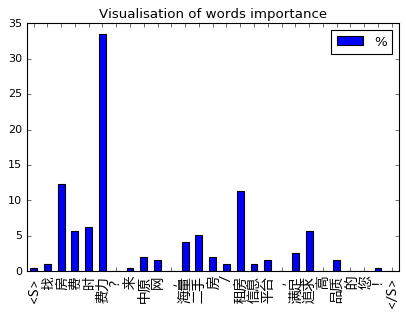

In [31]:
predict('找房费时费力？来中原网，海量二手房/租房信息平台，满足追求高品质的您！')

text_ids [399, 179, 1013, 398, 752, 1550, 110, 94, 80, 255, 13, 7, 80, 3513, 89, 738, 7, 67, 55, 696, 3388, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 399, 179, 1013, 398, 752, 1550, 110, 94, 80, 255, 13, 7, 80, 3513, 89, 738, 7, 67, 55, 696, 3388, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 3 11 30 19  6  7 17  2  1  4  5  3  0  1 14  2  6  0  1  7  7 21  1  0] 168 24
【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！
<S> 1.78571428571
【 6.54761904762
装修 17.8571428571
福利 11.3095238095
】 3.57142857143
国际 4.16666666667
大师 10.119047619
为 1.19047619048
您 0.595238095238
免费 2.38095238095
设计 2.97619047619
家 1.78571428571
, 0.0
免费 0.595238095238
测量 8.33333333333
出 1.19047619048
图 3.57142857143
, 0.0
仅 0.595238095238
限 4.16666666667
100 4.16666666667
席 12.5
！ 0.595238095238
</S> 0.0


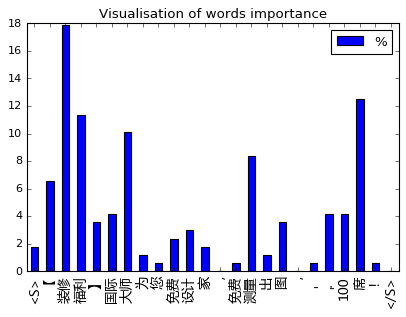

In [32]:
predict('【装修福利】国际大师为您免费设计家,免费测量出图,仅限100席！')

text_ids [105, 3181, 22, 884, 7, 136, 401, 3490, 3484, 27, 1502, 12, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 105, 3181, 22, 884, 7, 136, 401, 3490, 3484, 27, 1502, 12, 20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [ 4  5 35 25 47  5  3  6 10  8  1 13  0  3  0] 165 15
专业电视机维修,让它三生三世都陪你!
<S> 2.42424242424
专业 3.0303030303
电视 21.2121212121
机 15.1515151515
维修 28.4848484848
, 3.0303030303
让 1.81818181818
它 3.63636363636
三生 6.06060606061
三世 4.84848484848
都 0.606060606061
陪 7.87878787879
你 0.0
! 1.81818181818
</S> 0.0


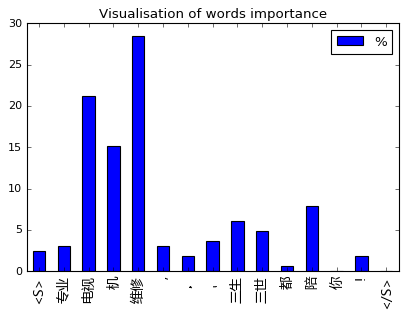

In [33]:
predict('专业电视机维修,让它三生三世都陪你!')